# **Customer Segmentation Project**

**Business Problem:**

As part of the marketing team, we are building this model in collaboration with data-science team to evaluate the success of our existing marketing campaigns so far and optimize our marketing budgets to target the most responsive customers.

Our dataset basically includes information about customer demographics and spending habits, along with a binary variable labelled Response. Our aim is to use this target variable to predict the likelihood of a customer engaging with our marketing campaign. This is why a clustering algorithm is needed as we’re working with diverse groups of customers.

In addition to that, we have some binary variables related to campaigns launched by our company, with feedback from responsive (1)  or unresponsive (0) customers, and we will be using this data to help us find common patterns among customers.

## **Expoloratoty Data Analysis:**

## Introduction to variable

In [1]:
import os

os.getcwd()

'c:\\Users\\torto\\OneDrive\\NOVA be like\\3rd module\\2767-Machine Learning-2425_T3'

In [2]:
import pandas as pd
import io
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv('marketing_campaign.csv',sep=',')


df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
## Column descriptions
column_descriptions = {
    "Variable": [
        "ID", "Year_Birth", "Education", "Marital_Status", "Income",
        "Kidhome", "Teenhome", "Dt_Customer", "Recency", "MntWines",
        "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts",
        "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
        "NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4",
        "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response", "Z_CostContact", "Z_Revenue"
    ],
    "Description": [
        "Unique customer identifier",
        "Year the customer was born",
        "Customer's education level",
        "Customer's marital status",
        "Annual household income of the customer",
        "Nbr of small children in the household",
        "Nbr of teenagers in the household",
        "Date the customer joined the company",
        "Nbr of days since the last purchase",
        "Amount spent on wine products",
        "Amount spent on fruit products",
        "Amount spent on meat products",
        "Amount spent on fish products",
        "Amount spent on sweet products",
        "Amount spent on gold products",
        "Nbr of purchases with a discount",
        "Nbr of purchases made online",
        "Nbr of purchases made using a catalog",
        "Nbr of purchases made directly in stores",
        "Nbr of visits to company website in last month",
        "1 if 3rd campaign accepted, 0 otherwise",
        "1 if 4th campaign accepted, 0 otherwise",
        "1 if 5th campaign accepted, 0 otherwise",
        "1 if 1st campaign accepted, 0 otherwise",
        "1 if 2nd campaign accepted, 0 otherwise",
        "1 if complaint filed in last 2 years, 0 otherwise",
        "1 if response obtained for last campaign, 0 otherwise",
        "Constant",
        "Constant"
    ]
}

# Convert dictionary to DataFrame
variable_explanation_df = pd.DataFrame(column_descriptions)

# Display the DataFrame as a table
from IPython.display import display
display(variable_explanation_df)

,Variable,Description
0,ID,Unique customer identifier
1,Year_Birth,Year the customer was born
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Annual household income of the customer
5,Kidhome,Nbr of small children in the household
6,Teenhome,Nbr of teenagers in the household
7,Dt_Customer,Date the customer joined the company
8,Recency,Nbr of days since the last purchase
9,MntWines,Amount spent on wine products


In [4]:
## Checking for duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
## Displaying summary statistics for numerical columns
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
## Dropping unncessary and constant columns
df.drop(["Dt_Customer","ID","Z_CostContact","Z_Revenue"],axis=1,inplace=True)

In [7]:
## Displaying summary statistics for categorical columns
df.describe(include='object')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [8]:
## Counting null rows in each columns
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

The 'Income' column has 24 null values which we need to address.

In [9]:
## Replacing null values in Income with its mean value
df['Income'] = df['Income'].fillna(df['Income'].mean())
## Counting nulls
df['Income'].isnull().sum()

np.int64(0)

In [10]:
## Displaying and counting the values per category in 'Marital_Status'
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
## Replacing 'Alone', 'Absurd', and 'YOLO' with 'Single' to reduce number of categories
df['Marital_Status']=df['Marital_Status'].replace({'Alone':'Single','YOLO':'Single','Absurd':'Single'})

## Checking the categories
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

In [12]:
## Displaying and counting the values per category in 'Education'
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [13]:
# Replacing 'PhD', '2n Cycle', 'Graduation', and 'Master' with 'PG' in the 'Education' column
df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'PG')
# Replacing 'Basic' with 'UG' in the 'Education' column
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [14]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,PG,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,PG,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,PG,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,PG,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PG,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


In [15]:
## Displaying and counting the values per category in 'Education'
df['Education'].value_counts()

Education
PG    2186
UG      54
Name: count, dtype: int64

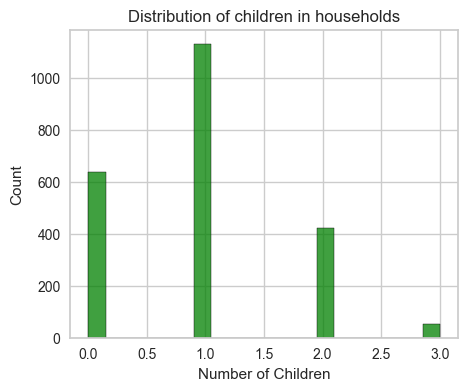

In [16]:
## Combining Teenhome and Kidhome in one variable: 'Children'
df['Children'] = df['Teenhome']+df['Kidhome']

## Distribution of children in households
plt.figure(figsize=(5, 4))
sns.histplot(df['Children'], color='green')
plt.title("Distribution of children in households")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()

In [17]:
## Dropping 'Kidhome' and 'Teenhome'
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [18]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children
0,1957,PG,Single,58138.0,58,635,88,546,172,88,...,4,7,0,0,0,0,0,0,1,0
1,1954,PG,Single,46344.0,38,11,1,6,2,1,...,2,5,0,0,0,0,0,0,0,2
2,1965,PG,Together,71613.0,26,426,49,127,111,21,...,10,4,0,0,0,0,0,0,0,0
3,1984,PG,Together,26646.0,26,11,4,20,10,3,...,4,6,0,0,0,0,0,0,0,1
4,1981,PG,Married,58293.0,94,173,43,118,46,27,...,6,5,0,0,0,0,0,0,0,1


<Figure size 800x800 with 0 Axes>

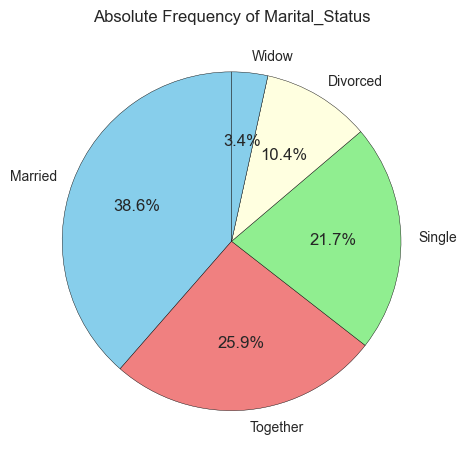

<Figure size 800x800 with 0 Axes>

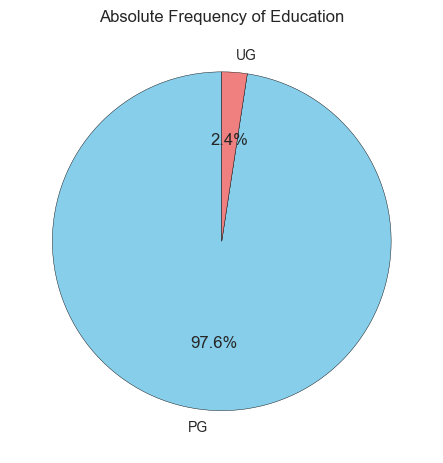

In [19]:
# Plot absolute frequencies for important variables using pie charts

v_for_pie = [ 'Marital_Status', 'Education']

for var in v_for_pie:
    absolute_freq = df[var].value_counts().to_frame(name='Absolute Frequency')

    # Plot absolute frequency as a pie chart
    plt.figure(figsize=(8, 8))
    absolute_freq.plot.pie(y='Absolute Frequency', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow'], legend=False, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Absolute Frequency of {var}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

In [20]:
# Identify numerical variables in the DataFrame
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print(numerical_vars)

['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Children']


In [21]:
# Initialize an empty DataFrame to store the results
skew_kurt_df = pd.DataFrame(columns=['Variable', 'Skewness', 'Kurtosis'])

# Calculate skewness and kurtosis for numerical variables
for var in numerical_vars:
    try:
        skewness = df[var].skew()
        kurtosis = df[var].kurtosis()

        # Append the results to the DataFrame
        skew_kurt_df = pd.concat([skew_kurt_df, pd.DataFrame({'Variable': [var], 'Skewness': [skewness], 'Kurtosis': [kurtosis]})], ignore_index=True)
    except KeyError as e:
        print(f"KeyError: {e} - Variable '{var}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Display the results as a table
display(skew_kurt_df)

C:\Users\torto\AppData\Local\Temp\ipykernel_25608\3153372457.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  skew_kurt_df = pd.concat([skew_kurt_df, pd.DataFrame({'Variable': [var], 'Skewness': [skewness], 'Kurtosis': [kurtosis]})], ignore_index=True)


,Variable,Skewness,Kurtosis
0,Year_Birth,-0.349944,0.717464
1,Income,6.799965,161.394217
2,Recency,-0.001987,-1.201897
3,MntWines,1.175771,0.598744
4,MntFruits,2.102063,4.050976
5,MntMeatProducts,2.083233,5.516724
6,MntFishProducts,1.919769,3.096461
7,MntSweetProducts,2.136081,4.376548
8,MntGoldProds,1.886106,3.551709
9,NumDealsPurchases,2.418569,8.936914


C:\Users\torto\AppData\Local\Temp\ipykernel_25608\2809253073.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
C:\Users\torto\AppData\Local\Temp\ipykernel_25608\2809253073.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')


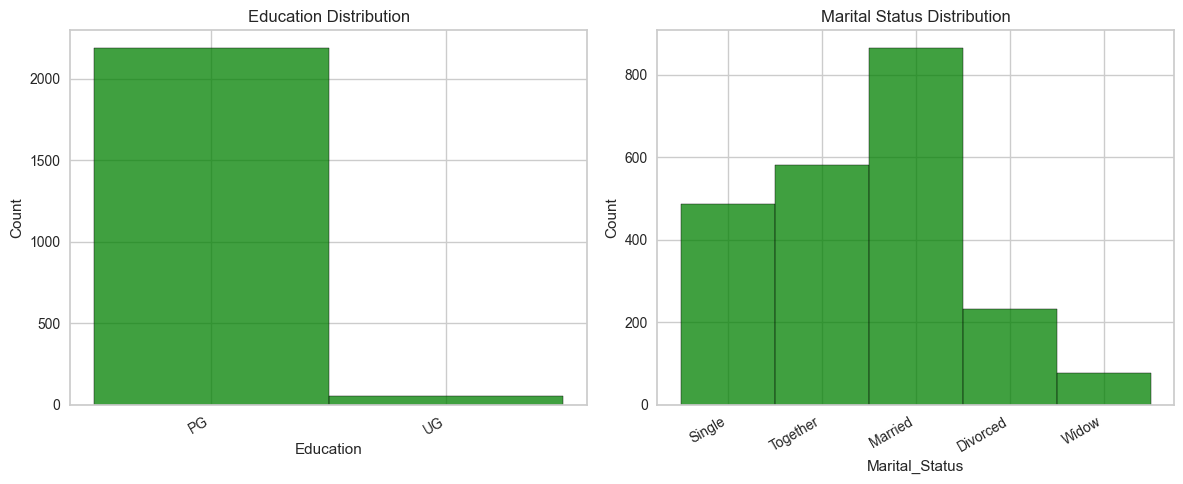

In [22]:
## Plotting distributions of Education and Marital Status
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(df['Education'], ax=axes[0], color ='green')
axes[0].set_title("Education Distribution")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')

sns.histplot(df['Marital_Status'], ax=axes[1],  color ='green')
axes[1].set_title("Marital Status Distribution")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

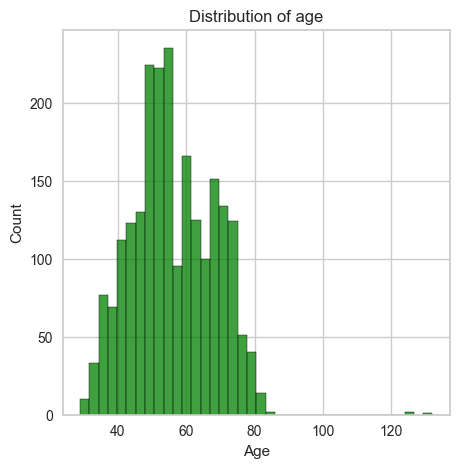

In [23]:
## Distribution of age of the customers
df['Age'] = 2025-df['Year_Birth']
plt.figure(figsize=(5,5))
plt.title("Distribution of age")
sns.histplot(df['Age'], color='green')
plt.show()

In [24]:
## Dropping some outliers identified above 81
df['Age'] = df['Age'].clip(upper=81)

In [25]:
## Combining campaigns, expenses, and purchases into single columns
df['Accepted_Campaigns'] = df.get('AcceptedCmp3', 0) + df.get('AcceptedCmp4', 0) + \
                             df.get('AcceptedCmp5', 0) + df.get('AcceptedCmp1', 0) + df.get('AcceptedCmp2', 0)

df['Total_Purchases'] = df.get('NumWebPurchases', 0) + df.get('NumCatalogPurchases', 0) + \
                          df.get('NumStorePurchases', 0) + df.get('NumDealsPurchases', 0)

df['Total_Expenses'] = df.get('MntWines', 0) + df.get('MntFruits', 0) + df.get('MntMeatProducts', 0) + \
                         df.get('MntFishProducts', 0) + df.get('MntSweetProducts', 0) + df.get('MntGoldProds', 0)

## Dropping the combined columns
dropped = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

existing_columns = [col for col in dropped if col in df.columns]
df.drop(existing_columns, axis=1, inplace=True)

# Displaying new columns
print(df.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Children', 'Age',
       'Accepted_Campaigns', 'Total_Purchases', 'Total_Expenses'],
      dtype='object')


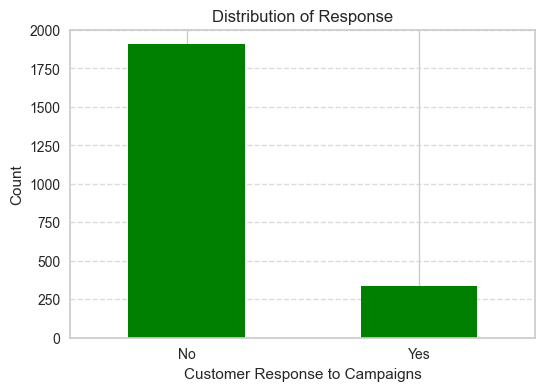

In [26]:
# Distribution of responses
plt.figure(figsize=(6, 4))
df["Response"].value_counts().plot(kind="bar", color=["green"])
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.xlabel("Customer Response to Campaigns")
plt.ylabel("Count")
plt.title("Distribution of Response")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

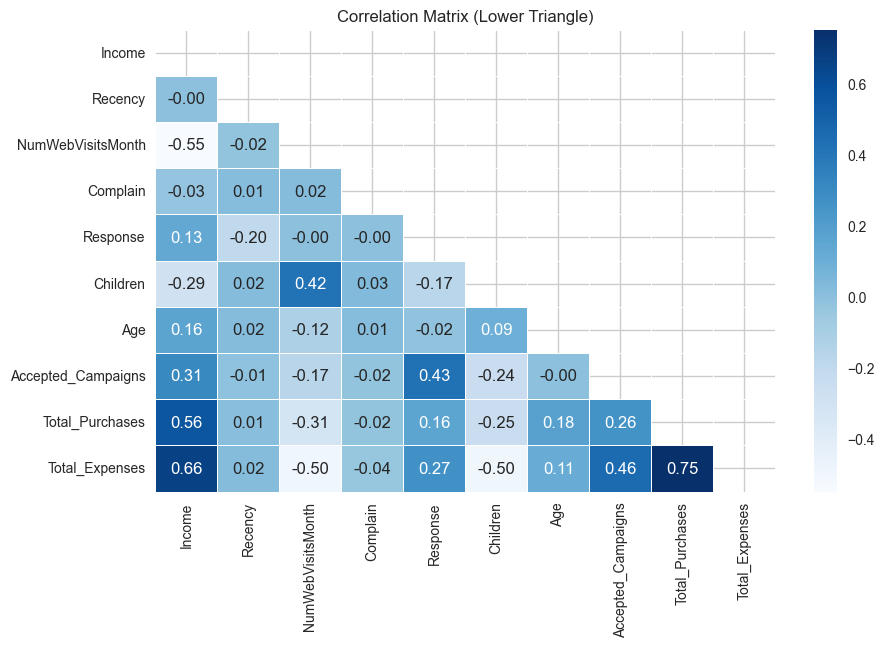

In [27]:
## Correlation Matrix
columns = [col for col in ['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
                           'Children', 'Age', 'Accepted_Campaigns', 'Total_Purchases', 'Total_Expenses']
           if col in df.columns]
correlation_matrix = df[columns].corr()

## Creating a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix (Lower Triangle)")
plt.show()

In [28]:
# Exclude specific columns
exclude_vars = ['Education', 'Complain', 'Response', 'Accepted_Campaigns', 'Marital_Status']
numerical_vars = [var for var in numerical_vars if var not in exclude_vars]

print(numerical_vars)

['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Children']


C:\Users\torto\AppData\Local\Temp\ipykernel_25608\704541582.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True, color='green')


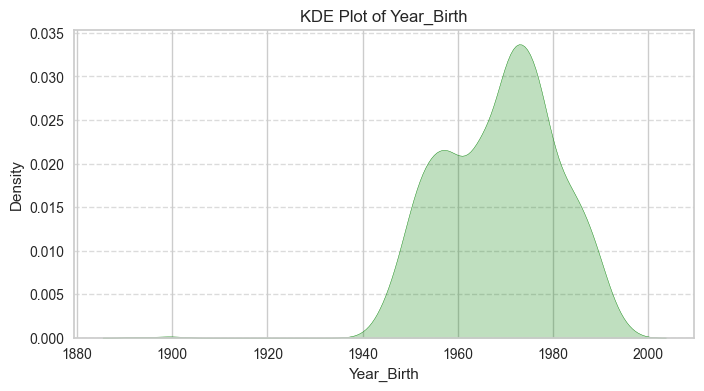

C:\Users\torto\AppData\Local\Temp\ipykernel_25608\704541582.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True, color='green')


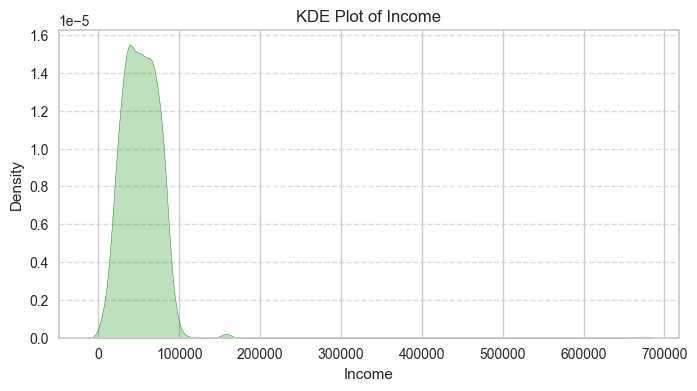

C:\Users\torto\AppData\Local\Temp\ipykernel_25608\704541582.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True, color='green')


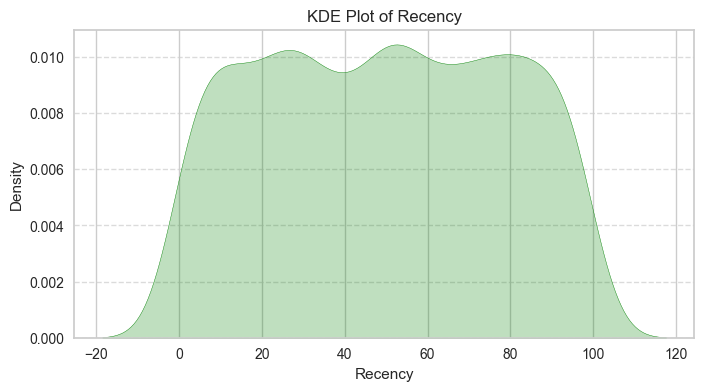

C:\Users\torto\AppData\Local\Temp\ipykernel_25608\704541582.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True, color='green')


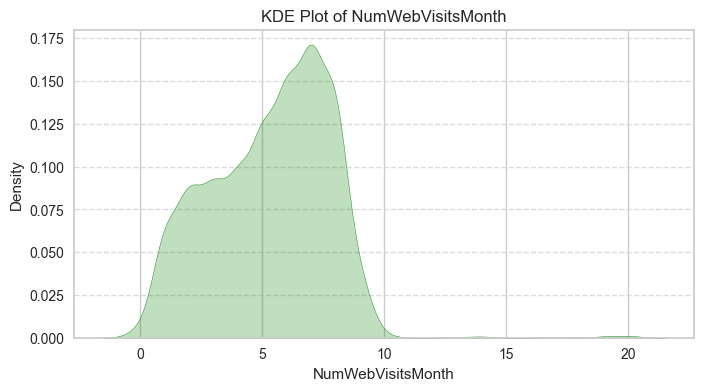

C:\Users\torto\AppData\Local\Temp\ipykernel_25608\704541582.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True, color='green')


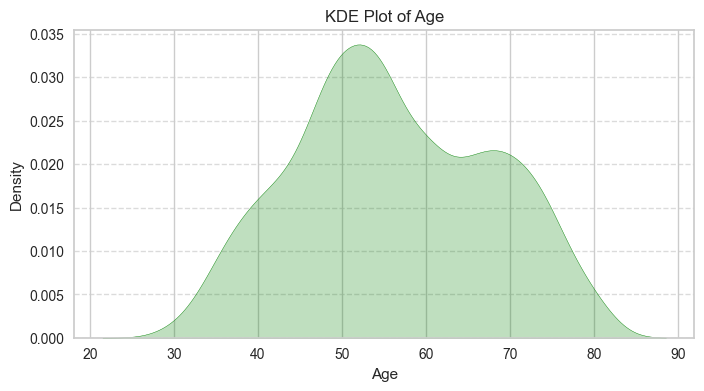

C:\Users\torto\AppData\Local\Temp\ipykernel_25608\704541582.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True, color='green')


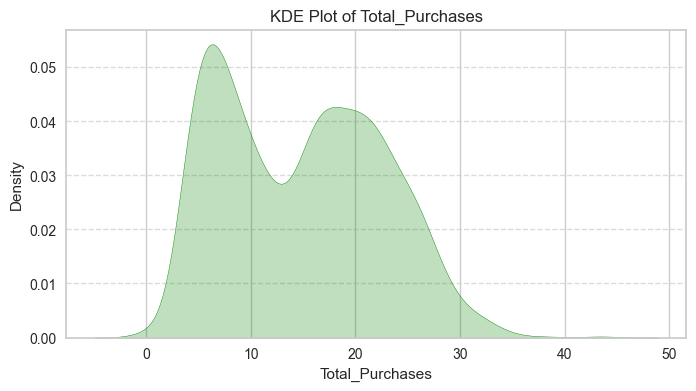

C:\Users\torto\AppData\Local\Temp\ipykernel_25608\704541582.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True, color='green')


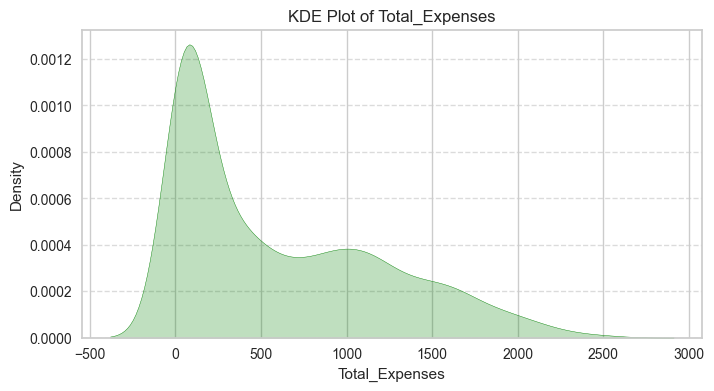

In [29]:
# List of numerical variables excluding 'Children'
numerical_vars = ['Year_Birth', 'Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'Total_Purchases', 'Total_Expenses']

# Exclude 'Children' and other specific columns if needed
exclude_vars = ['Children']
numerical_vars = [var for var in numerical_vars if var not in exclude_vars]

# Plot KDE for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[var], shade=True, color='green')
    plt.title(f'KDE Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

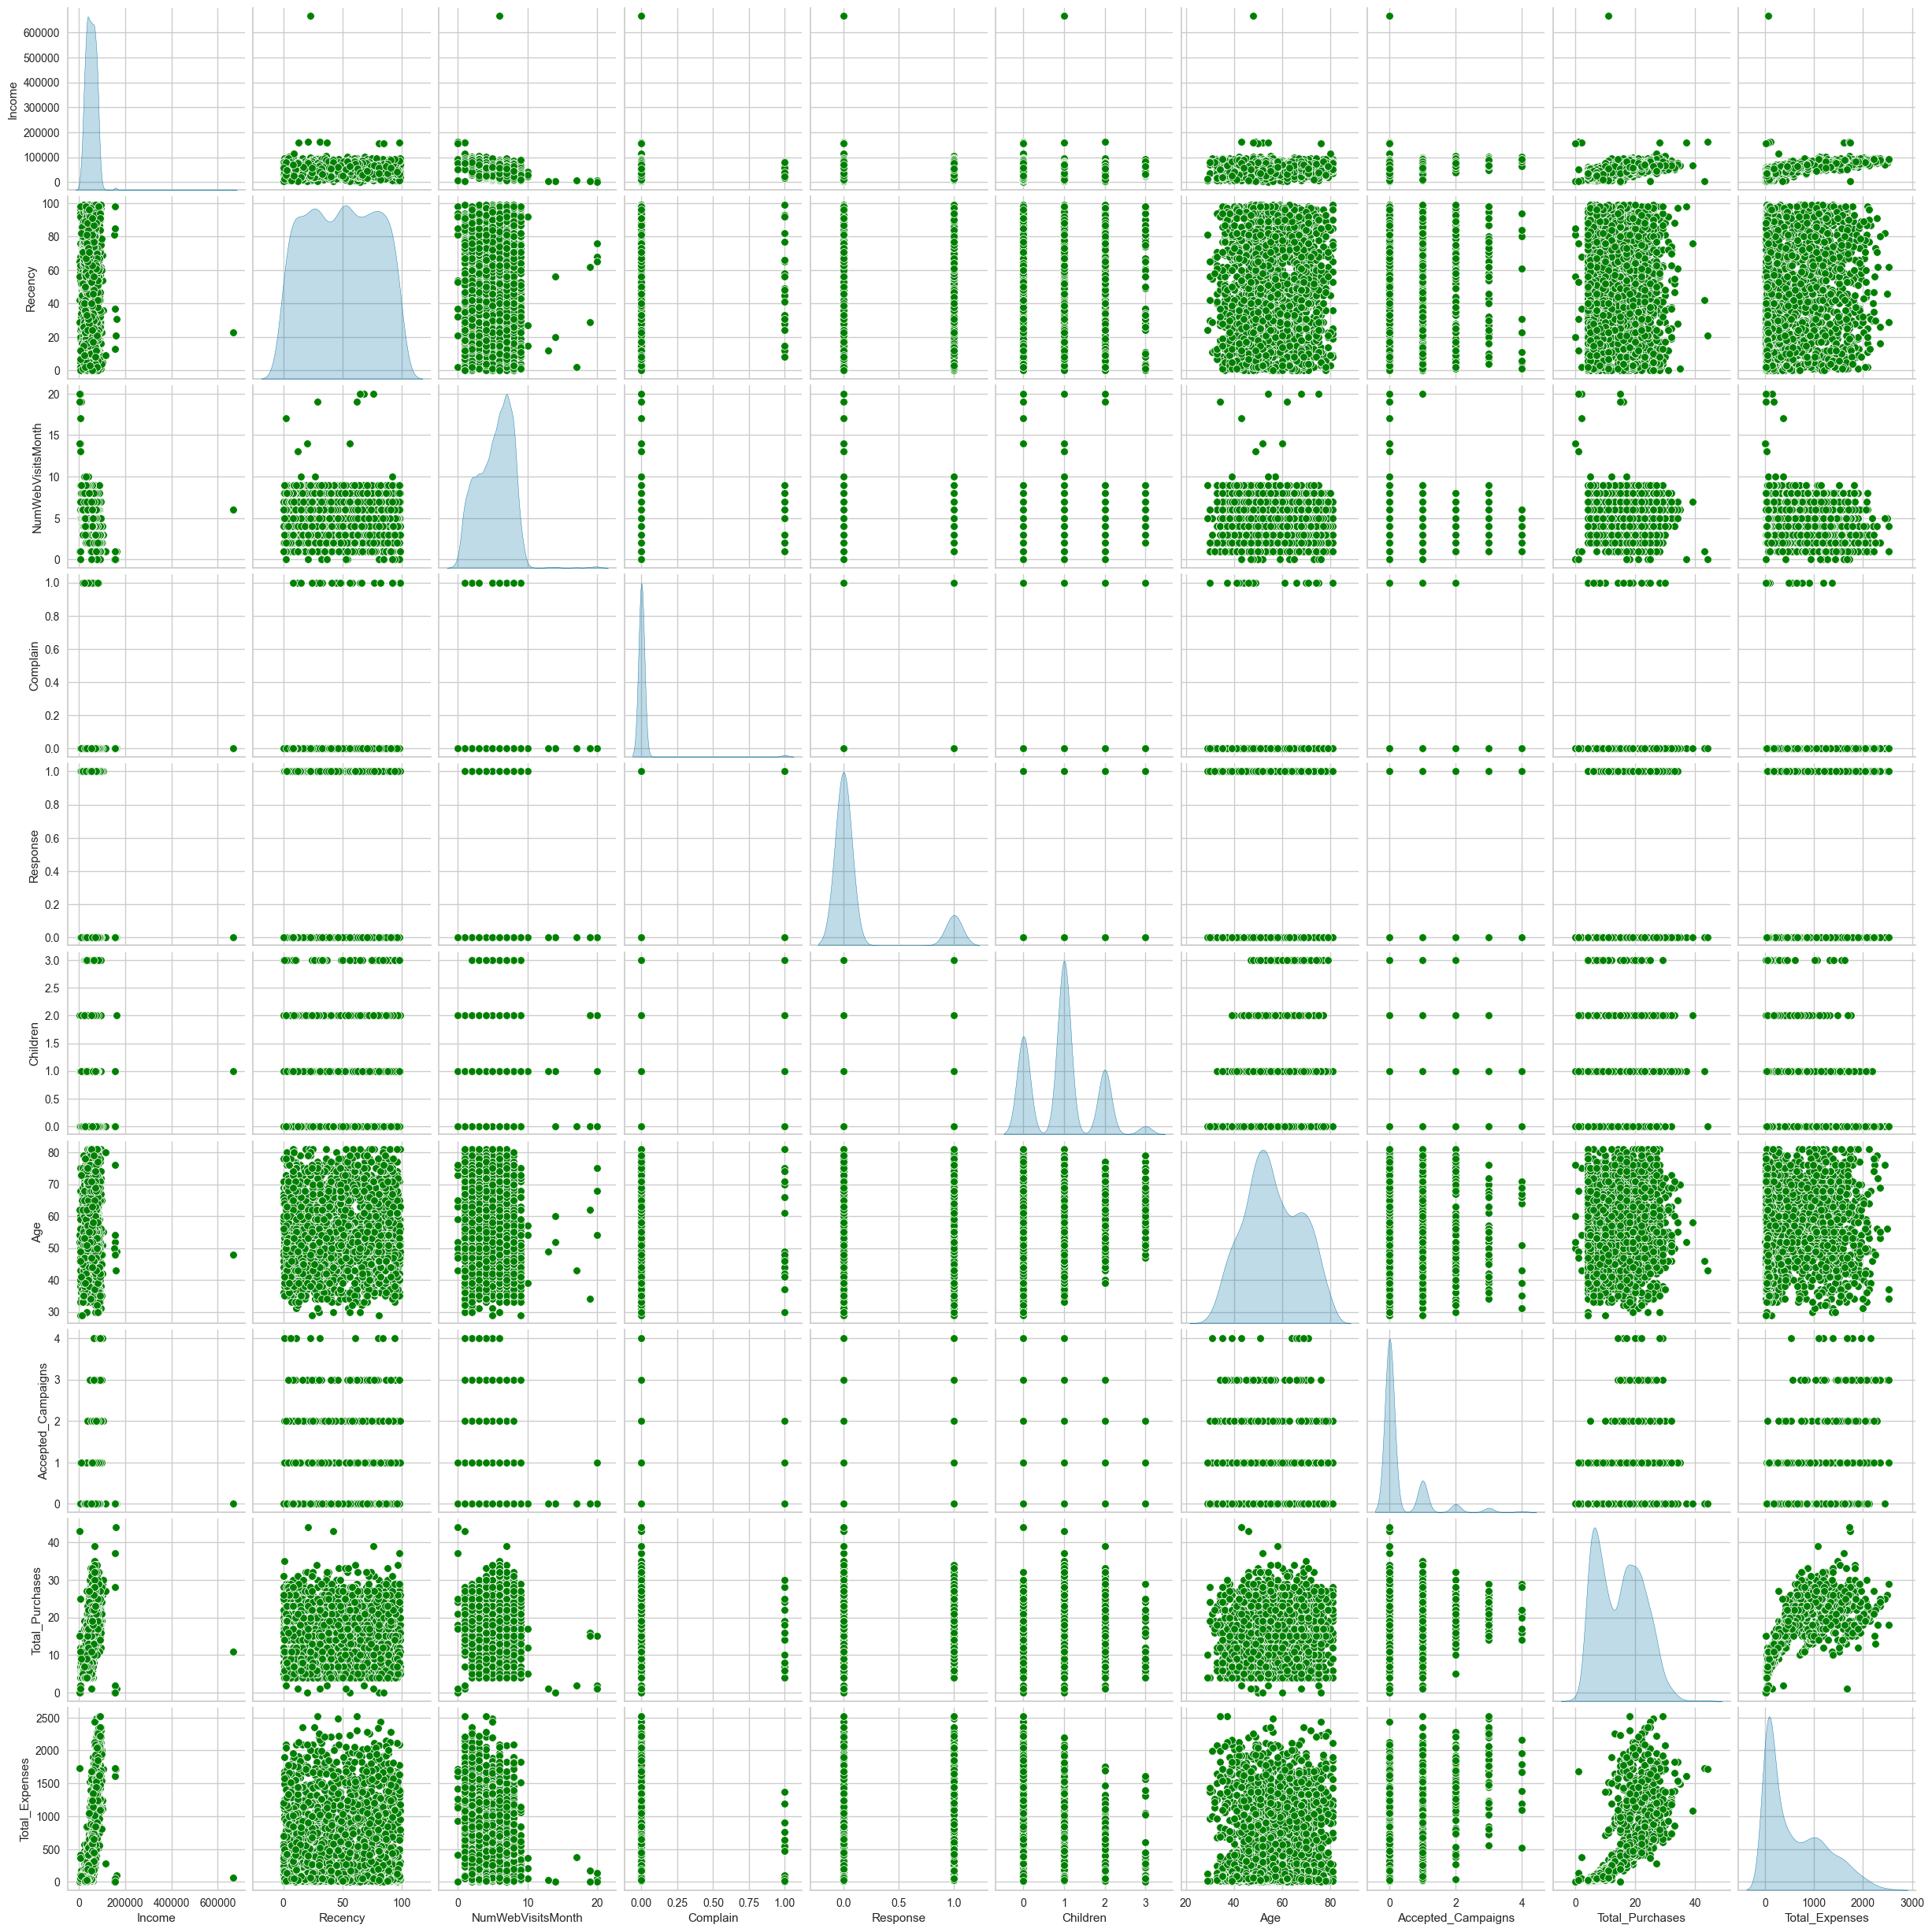

In [30]:
# Create the pair plot
sns.pairplot(df[columns], diag_kind='kde', plot_kws={'color':'green'})
plt.show()

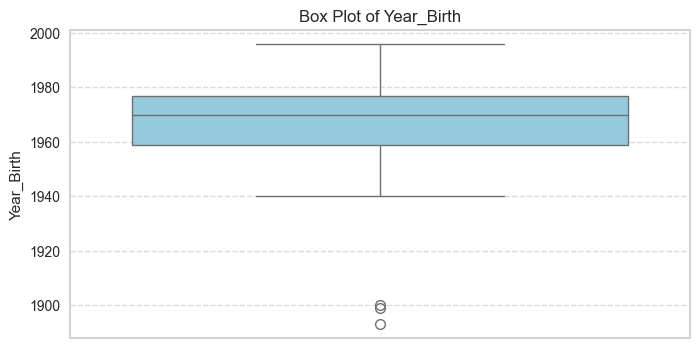

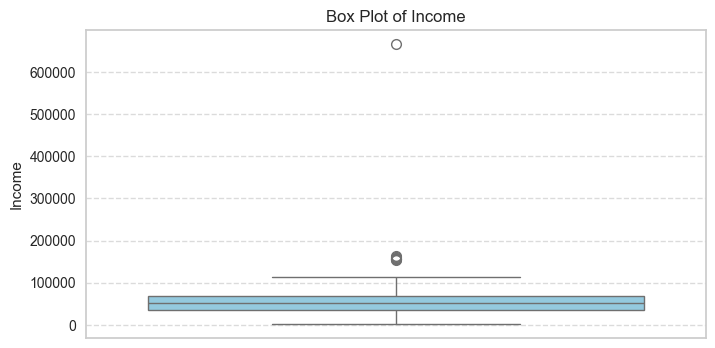

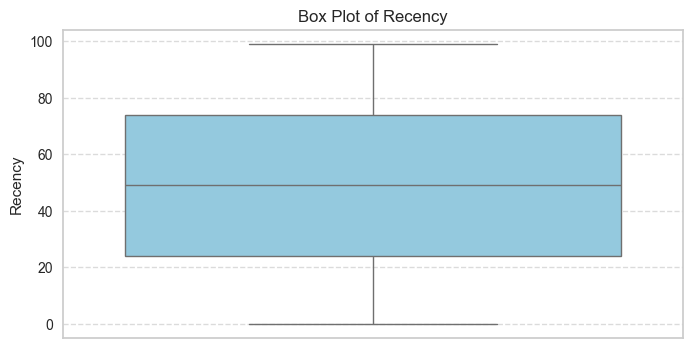

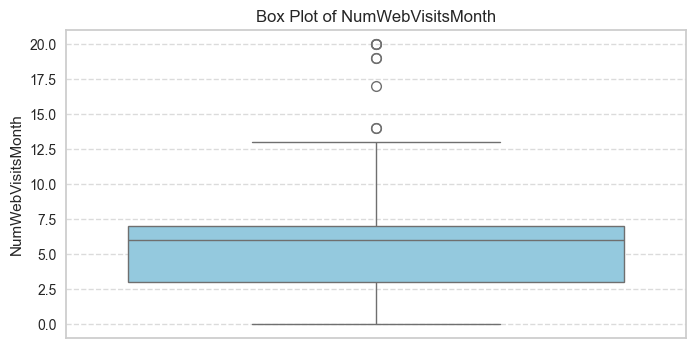

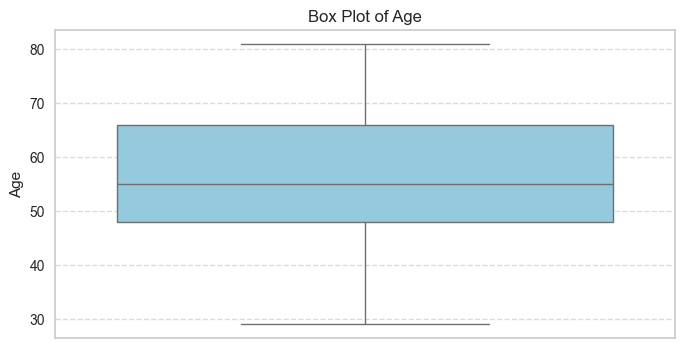

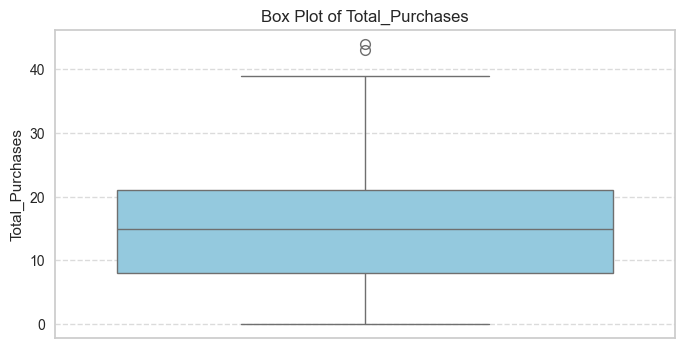

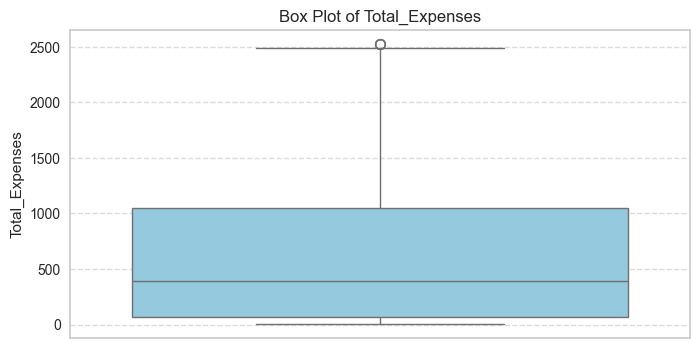

In [31]:
for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=var, data=df, color='skyblue')
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# **Main insights from EDA:**

---

*   ***Response rate:***

Based on the distribution of the response rate, we noticed that most customers have not responsed to marketing campaigns. Only 14.91% of customers responded positively to marketing campaigns, while 85.09% failed to engage.

*   ***Strong positive correlation between Income and Total Expenses:***

Based on the correlation matrix, there is a strong positive correlation (0.66) between Income and Total Expenses, which is expected. This means that customers with higher income tend to spend more money.
*   ***Strong negative correlation between Income and Website Visits:***

Based on the correlation matrix, there is a strong negative correlation (-0.55) between Income and Number of Website Visits. This suggests that customers with higher income tend to shop from the company's physical store and do not use the company's online services.


# **K-Means Clustering:**

In [32]:
from sklearn.preprocessing import LabelEncoder

# list of categorical columns
cat_df = list(df.select_dtypes(include=["object"]).columns)

# print the list of categorical columns
print(cat_df)

# label encoding for the categorical columns
LE = LabelEncoder()
# encoding the categorical columns
for col in df:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

['Education', 'Marital_Status']


In [33]:
## Checking value count for 'Complain' and 'Response'
print(df['Complain'].value_counts())
print(df['Response'].value_counts())

Complain
0    2219
1      21
Name: count, dtype: int64
Response
0    1906
1     334
Name: count, dtype: int64


In [34]:
from sklearn.preprocessing import StandardScaler

## Creating a copy of data
ds = df.copy()
## Creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
## Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [35]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Children,Age,Accepted_Campaigns,Total_Purchases,Total_Expenses
0,-0.985345,-0.157171,0.249890,0.235327,0.307039,0.693904,-1.264505,1.013792,-0.439037,1.320826,1.679417
1,-1.235733,-0.157171,0.249890,-0.235826,-0.383664,-0.130463,1.396361,1.269918,-0.439037,-1.154596,-0.961275
2,-0.317643,-0.157171,1.192234,0.773633,-0.798086,-0.542647,-1.264505,0.330791,-0.439037,0.799685,0.282673
3,1.268149,-0.157171,1.192234,-1.022732,-0.798086,0.281720,0.065928,-1.291338,-0.439037,-0.894025,-0.918094
4,1.017761,-0.157171,-0.692455,0.241519,1.550305,-0.130463,0.065928,-1.035212,-0.439037,0.539114,-0.305254


In [36]:
from sklearn.decomposition import PCA

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["Total_Expenses","Income", "Total_Purchases"]))
PCA_ds.describe().T
# scaled_ds.head()

,count,mean,std,min,25%,50%,75%,max
Total_Expenses,2240.0,-3.172066e-18,1.812809,-3.920095,-1.587748,-0.210393,1.394117,9.879996
Income,2240.0,-5.075305e-17,1.414959,-4.210556,-0.923271,-0.014410,1.059868,5.705650
Total_Purchases,2240.0,2.379049e-18,1.028861,-2.118630,-0.669852,-0.113241,0.531245,6.376878


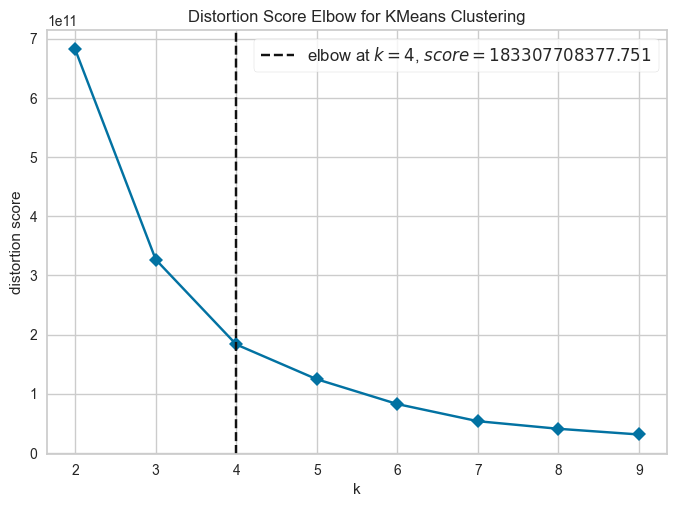

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
numeric_data = ds.select_dtypes(include=['number']).dropna()

# Create a K-Means model
model = KMeans(random_state=42, n_init=10)

# Use KElbowVisualizer to find the optimal K
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(numeric_data)  # Replace 'numeric_data' with your processed dataset
visualizer.show()


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting only numerical columns and dropping missing values
numeric_data = ds.select_dtypes(include=['number']).dropna()

# Apply K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(numeric_data)

# Compute Silhouette Score
silhouette_score_k4 = silhouette_score(numeric_data, cluster_labels)

print(f"Silhouette Score for K=4: {silhouette_score_k4:.4f}")

Silhouette Score for K=4: 0.5442


In [39]:
from sklearn.cluster import AgglomerativeClustering


#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

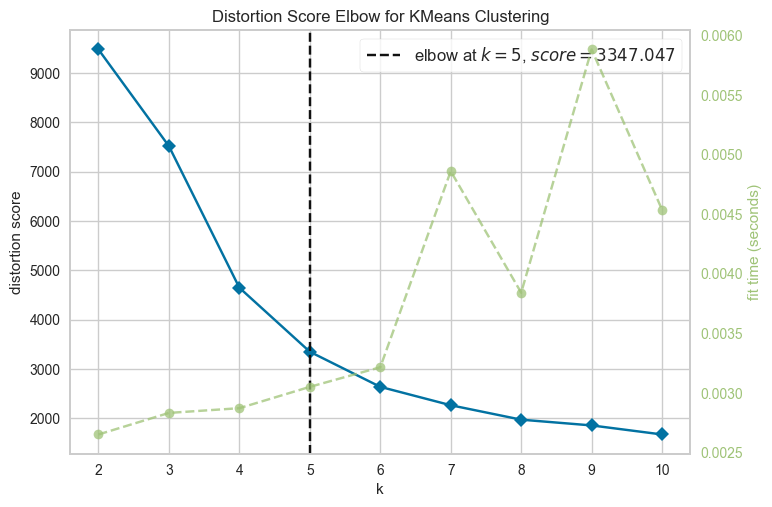

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# label encoding for the categorical columns
LE = LabelEncoder()
# encoding the categorical columns
for col in df:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

# Creating a copy of data
data = df.copy()
# reating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Complain', 'Response']
# Check if columns exist before dropping
cols_to_drop = [col for col in cols_del if col in data.columns]
data = data.drop(columns=cols_to_drop)  # Use data instead of df

# Scaling
# Assuming 'ds' should be 'data' here
scaler = StandardScaler()
scaler.fit(data)  # Fit on 'data' instead of 'ds'
scaled_ds = pd.DataFrame(scaler.transform(data), columns=data.columns)

# Initiating PCA to reduce dimensions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["Expenses", "Income", "TotalNumPurchases"]))
PCA_ds.describe().T

model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_ds)  # Fit the data to the visualizer
visualizer.show()

In [41]:
# Drop constant columns (columns with zero variance)
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
data.drop(columns=constant_columns, inplace=True)

# Apply log transformation to skewed numerical features (excluding negative or zero values)
numeric_columns = data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if (data[col] > 0).all():  # Ensure all values are positive before applying log
        data[col] = np.log1p(data[col])  # log1p(x) = log(1 + x) to handle zero values safely



In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting only numerical columns and dropping missing values
numeric_data = data.select_dtypes(include=['number']).dropna()

# Compute Silhouette Scores for K=4 and K=5
for k in [4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(numeric_data)
    score = silhouette_score(numeric_data, cluster_labels)
    print(f"Silhouette Score for K={k}: {score:.4f}")

Silhouette Score for K=4: 0.3994
Silhouette Score for K=5: 0.3514


# Clustering 

#### "Total_Expenses","Income", "Total_Purchases"

### withoud reducionation of dementions

In [43]:
print(scaled_ds.shape)

(2240, 12)


### scaled_ds

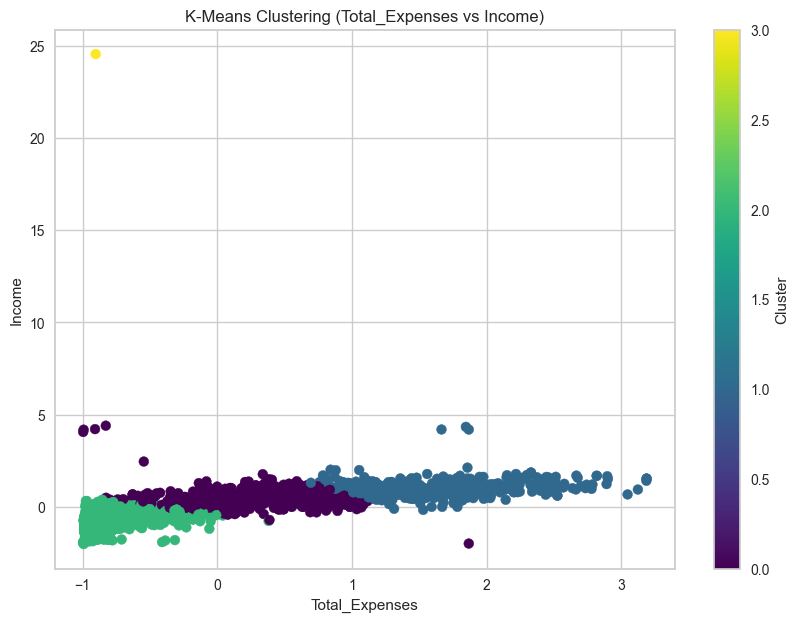

In [44]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming scaled_ds is your standardized DataFrame

# Step 1: Extract the relevant features
data = scaled_ds[['Total_Expenses', 'Income']]

# Step 2: Apply K-Means clustering
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_4.fit_predict(data)

# Add the cluster labels to the scaled_ds DataFrame
scaled_ds['Cluster'] = kmeans_labels

# Step 3: Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(data['Total_Expenses'], data['Income'], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (Total_Expenses vs Income)')
plt.xlabel('Total_Expenses')
plt.ylabel('Income')
plt.colorbar(label='Cluster')
plt.show()

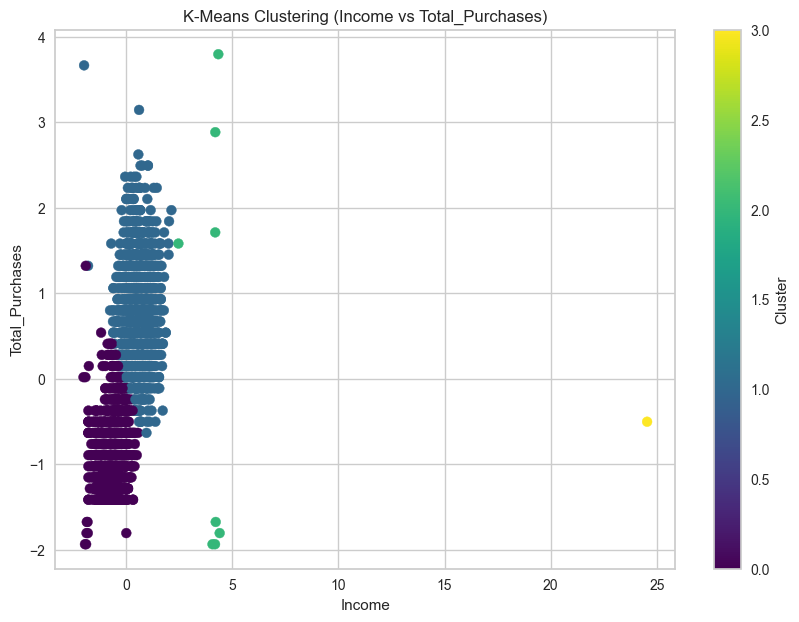

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming scaled_ds is your standardized DataFrame

# Step 1: Extract the relevant features
data = scaled_ds[['Income', 'Total_Purchases']]

# Step 2: Apply K-Means clustering
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_4.fit_predict(data)

# Add the cluster labels to the scaled_ds DataFrame
scaled_ds['Cluster'] = kmeans_labels

# Step 3: Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(data['Income'], data['Total_Purchases'], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (Income vs Total_Purchases)')
plt.xlabel('Income')
plt.ylabel('Total_Purchases')
plt.colorbar(label='Cluster')
plt.show()

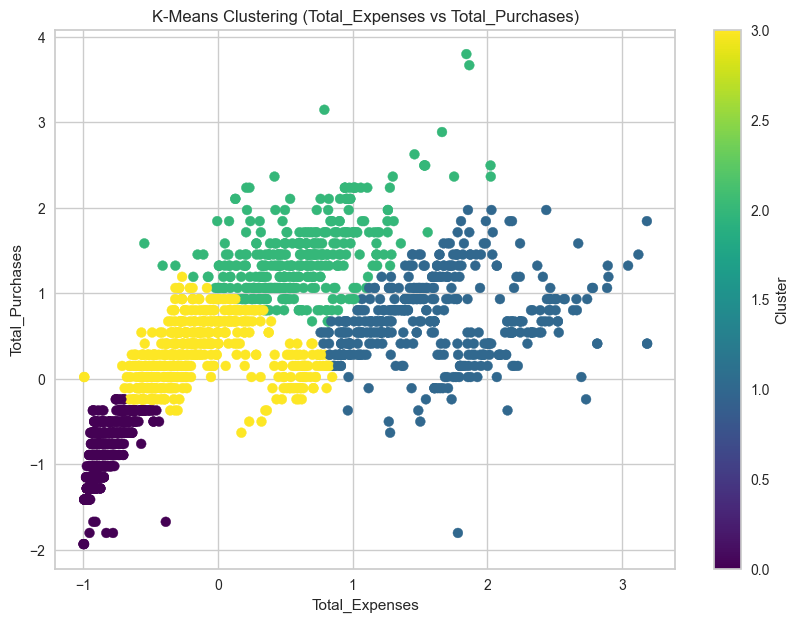

In [46]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming scaled_ds is your standardized DataFrame

# Step 1: Extract the relevant features
data = scaled_ds[['Total_Expenses', 'Total_Purchases']]

# Step 2: Apply K-Means clustering
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_4.fit_predict(data)

# Add the cluster labels to the scaled_ds DataFrame
scaled_ds['Cluster'] = kmeans_labels

# Step 3: Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(data['Total_Expenses'], data['Total_Purchases'], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (Total_Expenses vs Total_Purchases)')
plt.xlabel('Total_Expenses')
plt.ylabel('Total_Purchases')
plt.colorbar(label='Cluster')
plt.show()

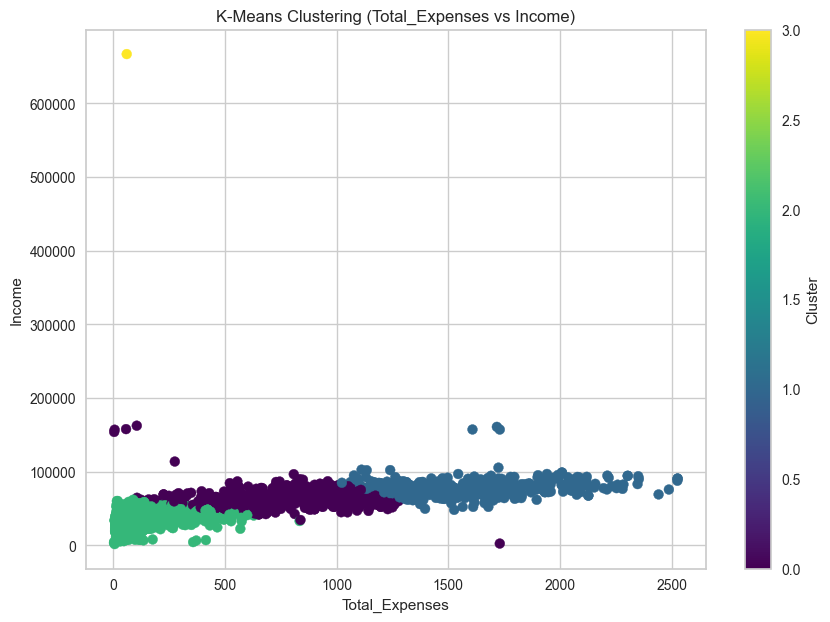

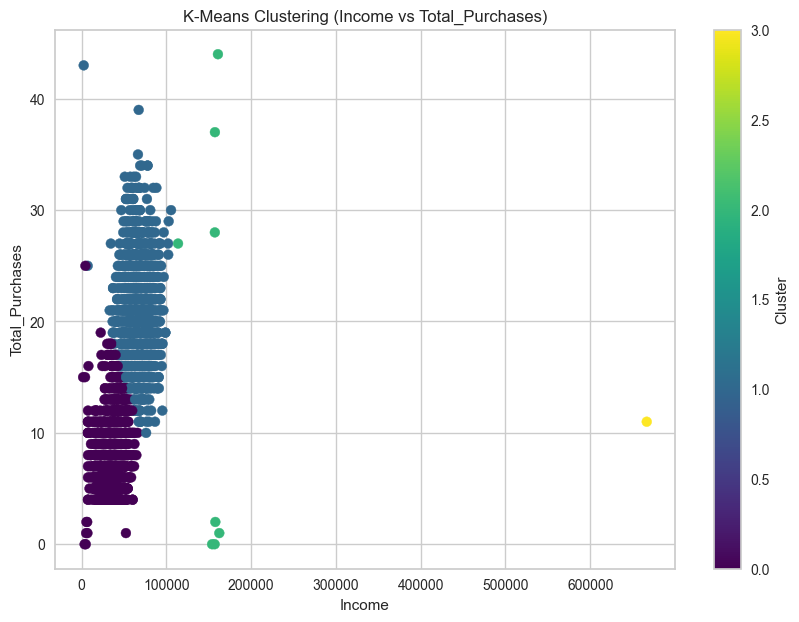

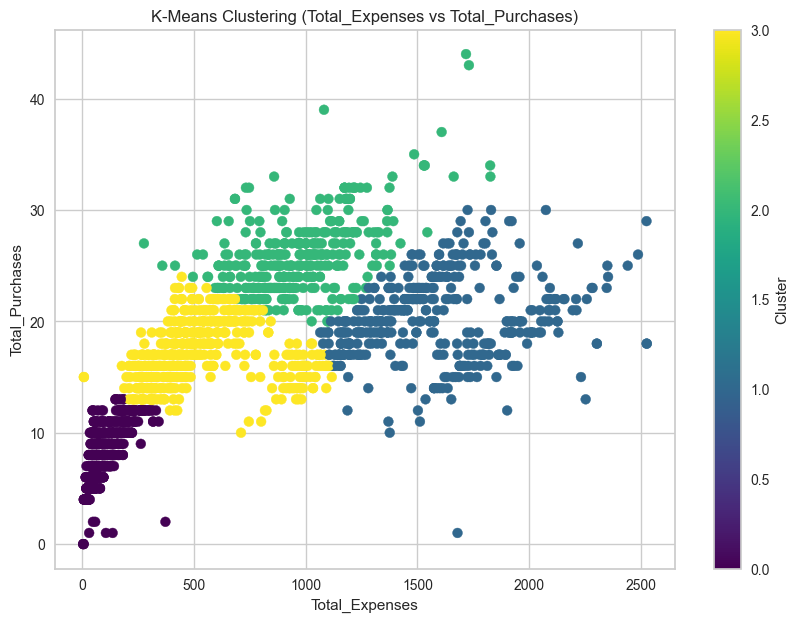

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame

# Standardize the relevant features
scaler = StandardScaler()

# Function to perform clustering and plot results
def cluster_and_plot(df, features, n_clusters=4, random_state=42):
    # Extract the relevant features
    data = df[features]
    
    # Standardize the data
    data_scaled = scaler.fit_transform(data)
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    
    # Add the cluster labels to the original DataFrame
    df['Cluster'] = kmeans_labels
    
    # Visualize the results
    plt.figure(figsize=(10, 7))
    plt.scatter(data[features[0]], data[features[1]], c=kmeans_labels, cmap='viridis', s=50)
    plt.title(f'K-Means Clustering ({features[0]} vs {features[1]})')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.colorbar(label='Cluster')
    plt.show()

# Plot 1: Total_Expenses vs Income
cluster_and_plot(df, ['Total_Expenses', 'Income'])

# Plot 2: Income vs Total_Purchases
cluster_and_plot(df, ['Income', 'Total_Purchases'])

# Plot 3: Total_Expenses vs Total_Purchases
cluster_and_plot(df, ['Total_Expenses', 'Total_Purchases'])

#### 3D plot

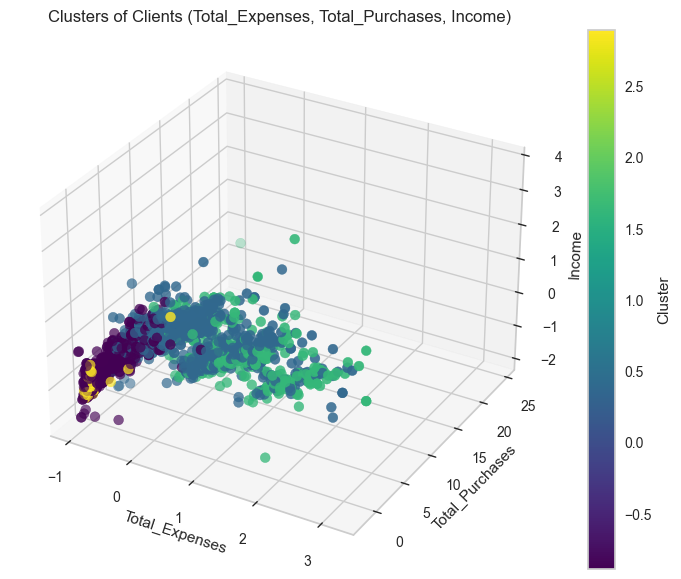

In [48]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_ds['Total_Expenses'], scaled_ds['Income'], scaled_ds['Total_Purchases'], 
                     c=scaled_ds['Clusters'], cmap='viridis', s=50)

# Personalisation
ax.set_title('Clusters of Clients (Total_Expenses, Total_Purchases, Income)')
ax.set_xlabel('Total_Expenses')
ax.set_zlabel('Income')
ax.set_ylabel('Total_Purchases')
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

#### It looks berally understanable so it was suggested to use PCA

In [49]:
X = df[numerical_vars]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_vars])

pca = PCA(n_components=2)
X_pca_2D = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

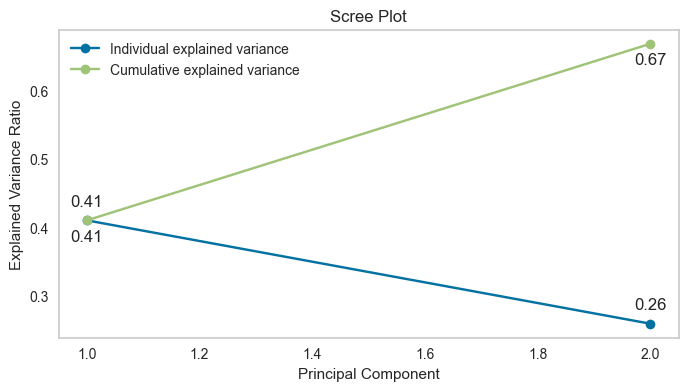

In [50]:
# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', label='Cumulative explained variance')

# Add annotations
for i, (ev, cev) in enumerate(zip(explained_variance, cumulative_explained_variance)):
    plt.annotate(f'{ev:.2f}', (i + 1, ev), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{cev:.2f}', (i + 1, cev), textcoords="offset points", xytext=(0, -15), ha='center')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

The blue line represents the explained variance ratio for each principal component.
The green line represents the cumulative explained variance, which shows how much total variance is retained as more components are added.

PC1 Explains 41% of variance, while PC2 explains only 26% of variance
However PC1 explains only 41% of Cumulative variance whlie PC2 explains 67%


In [51]:

# Loadings (principal components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(explained_variance))], index=numerical_vars)
print("Loadings (Principal Components):")
display(loadings)

Loadings (Principal Components):


,PC1,PC2
Year_Birth,-0.291430,0.643362
Income,0.476410,0.202566
Recency,0.016327,-0.019597
NumWebVisitsMonth,-0.385525,-0.176790
Age,0.293115,-0.642249
Total_Purchases,0.459462,0.178980
Total_Expenses,0.492122,0.262479


In [52]:
# Scores (transformed data)
scores = pd.DataFrame(X_pca_2D, columns=[f'PC{i+1}' for i in range(len(explained_variance))])
print("Scores (Transformed Data):")
display(scores)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca_2D)

Scores (Transformed Data):


,PC1,PC2
0,1.867273,-0.688851
1,-0.339514,-2.086779
2,1.260805,0.068801
3,-2.219553,1.002911
4,-0.311891,1.377628
...,...,...
2235,1.098941,0.291718
2236,1.382504,-2.415065
2237,0.171928,1.653197
2238,1.983113,-0.766226


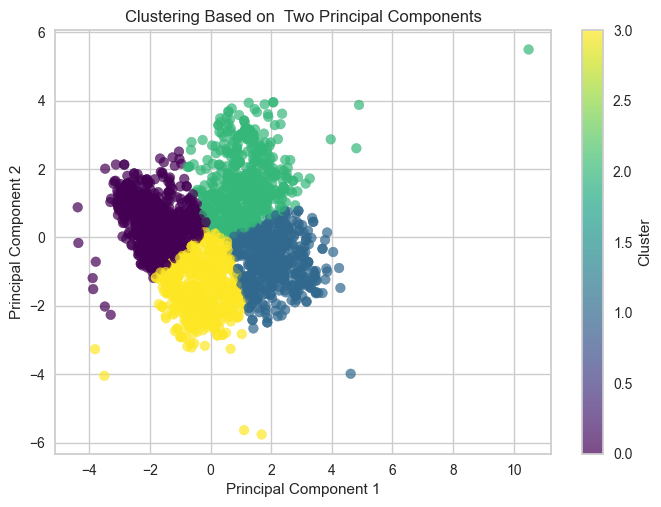

In [53]:
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Based on  Two Principal Components')
plt.colorbar(label='Cluster')
plt.show()